### 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=.2, random_state=42)

In [20]:
# 모델 생성
def model_fn(a_layer=None):     # model_function
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)       # 은닉층 추가
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  # verbose 훈련과정 출력을 조절 (디폴트 1)

- verbose : 훈련 과정 출력을 조절하는 매개변수 (기본값 = 1)
- 기본값(1)일 때, 에포크마다 진행막대와 손실지표들이 출력된다.
- verbose=2일 때, 진행막대가 빠진다.
- verbose=0일 때, 훈련과정을 나타내지 않는다.

In [5]:
history.history.keys()  # fit했더니, history객체 안에 history라는 딕셔너리가 생겼음

dict_keys(['loss', 'accuracy'])

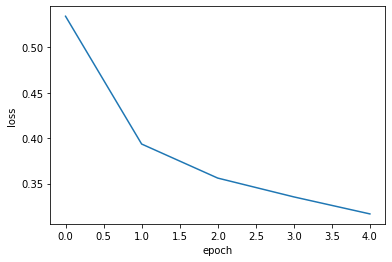

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

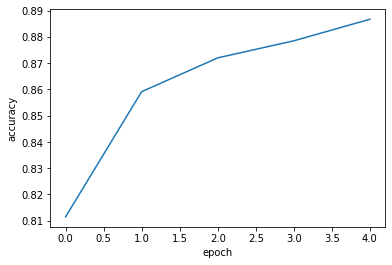

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

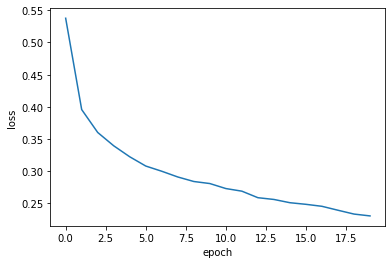

In [8]:
# 에포크의 횟수를 20으로 늘려서 모델을 훈련하고, 손실그래프를 그려보세요.
model = model_fn()  # 기존 모델에 겹쳐져서 나올 수 있으므로 새로 호출해주는게 좋다
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

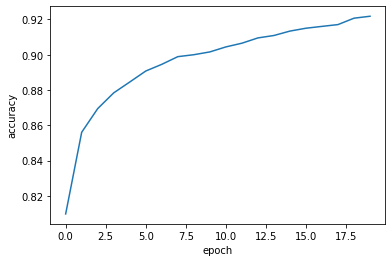

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

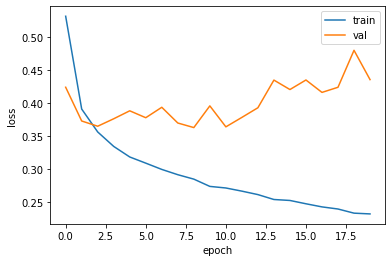

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 훈련데이터는 꾸준히 감소하지만, 검증데이터는 다시 상승하는 부분을 보이는 것은 전형적인 과대적합 모델이 만들어진 것을 말한다

adam - 과대적합을 막기위한 최적화 알고리즘으로 많이 씀

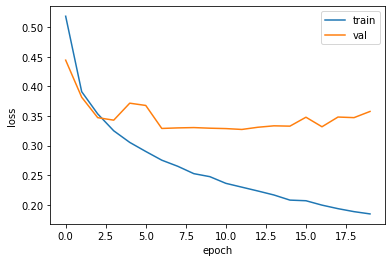

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 과대적합을 해결하는 다른 방법
히든층의 어떤 값을 drop out 시킴 -> 없앰
몇개를 없앨것인가? -> 개발자의 몫 (하이퍼 파라미터로 조절)

### 드롭아웃(Dropout)
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다. 
　　( = 출력값이 0이 되게 함  = 입력된 뉴런을 사용하지 않겠다)

In [14]:
model = model_fn(keras.layers.Dropout(0.3))  # 0.3 -> 30%를 드롭아웃시킴 => 100개중에서 30개 무시 -> 100은 그대로 존재
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


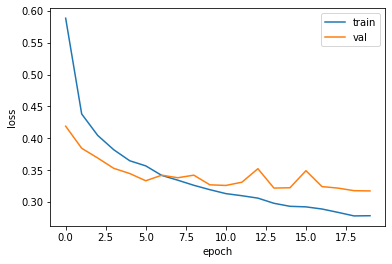

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

In [17]:
# 모델 저장과 복원
# 훈련된 모델의 파라미터를 저장
model.save_weights('model-weights.h5')  # HDF5 파일형식

In [18]:
# 모델 구조와 모델 파라미터를 저장
model.save('model-whole.h5')

In [19]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=.2, random_state=42)

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [22]:
import numpy as np
val_labels= np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8733333333333333


In [23]:
model.evaluate(val_scaled, val_target)   # 검증 확인

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3503681584397952, 0.87333333]

In [24]:
# 모델 불러오기
model1 = keras.models.load_model('model-whole.h5')
model1.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3503681584397952, 0.87333333]